In [ ]:
!pip install tabulate

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import datasets


%matplotlib inline


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
iris = datasets.load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
iris.data.shape # input features

(150, 4)

In [10]:
iris.target.shape # output labels

(150,)

In [11]:
print(f'features names: {iris.feature_names}')
print(f'target names: {iris.target_names}')

features names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


#Creating a dataframe

In [12]:
df = pd.DataFrame(data=np.c_[iris.data, iris.target],
                 columns=iris['feature_names']+['species'])

#Exploration

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [15]:
df['species'].value_counts()

0.0    50
1.0    50
2.0    50
Name: species, dtype: int64

In [20]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

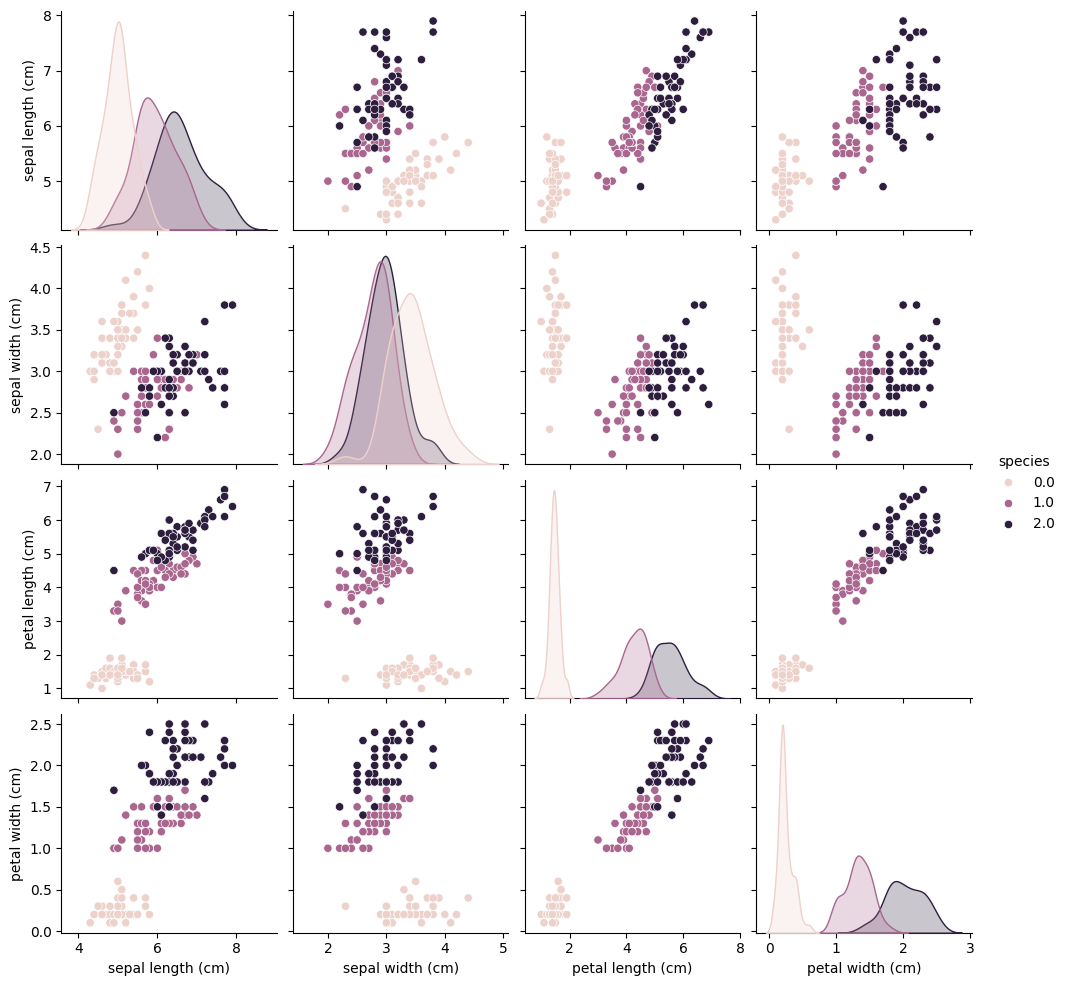

In [22]:
# see the relationship between each combination of 2 features with the target variable
sns.pairplot(df, hue='species')

#####The scatter plots show that we can distinguish species 0 based on petal length and width, but there's a bit of overlap between the other two species. On the contrary, it is difficult to distinguish between speice 1 and 2 using only sepal length and width features.*italicized text*


<Axes: >

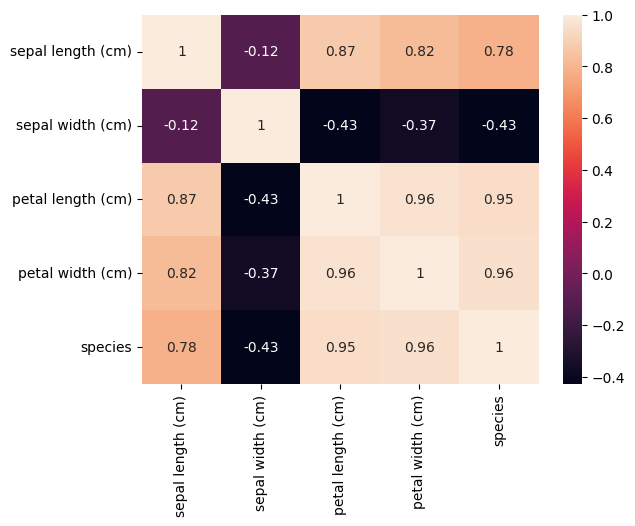

In [24]:
# see corrolation among features
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)

######Petal length and width have a strong correlation with the species, with values of 0.95 and 0.96, respectively. This suggests that these two features are likely the most important in determining the species.

In [91]:
score = 'accuracy'

classification_models = {'LR': LogisticRegression(),
                          'DecisionTree': DecisionTreeClassifier(),
                          'SVM': SVC()
                        }
def models(X_train, Y_train, score):
    results = {}

    # add your models
    for algo_name, model in classification_models.items():
        k_fold = KFold(n_splits=15, shuffle=True, random_state=42)

        cv_score = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=score)
        results[algo_name] = [cv_score.mean(), cv_score.std()]

    return results


In [126]:
def eval_models(X_train, X_test, y_test):
    train_acc = 0.0
    test_acc = 0.0
    max_train_acc = 0.0
    max_test_acc = 0.0
    for algo_name, model in classification_models.items():
        history = model.fit(X_train, y_train)
        print(history)
        train_acc = model.score(X_train, y_train)
        y_pred = model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        print(f'{algo_name}')
        cm = confusion_matrix(y_test, y_pred)

        # Visualize the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        print(f'classification_report :\n{classification_report(y_test, y_pred)}')
        print('-'*50)

        if train_acc > max_train_acc:
            max_train_acc = train_acc
            best_algo_train = algo_name

        if test_acc > max_test_acc:
            max_test_acc = test_acc
            best_algo_test = algo_name

    return best_algo_train, max_train_acc, best_algo_test, max_test_acc






In [127]:
test_size = 0.30

X = df.iloc[:, :4]
y = df['species']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [132]:
best_algo_train_list = []
max_train_acc_list = []
best_algo_test_list = []
max_test_acc_list = []

##Try using all features

In [133]:
print('including all features')
models(X_train, y_train, score)

including all features


{'LR': [0.9523809523809524, 0.06734350297014742],
 'DecisionTree': [0.9047619047619049, 0.09988655696858587],
 'SVM': [0.9619047619047619, 0.06317380553057907]}

LogisticRegression()
LR


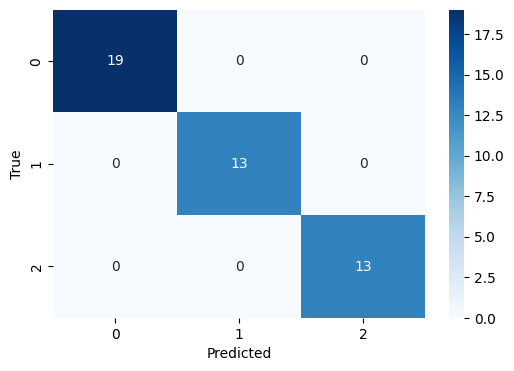

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------
DecisionTreeClassifier()
DecisionTree


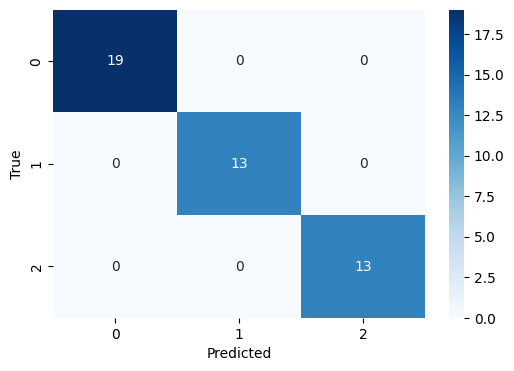

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------
SVC()
SVM


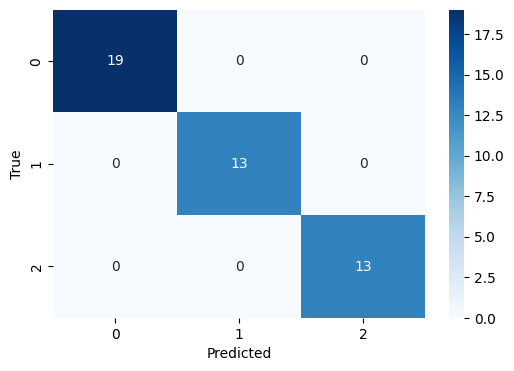

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------


In [134]:
best_algo_train, max_train_acc, best_algo_test, max_test_acc = eval_models(X_train, X_test, y_test)
best_algo_train_list.append(best_algo_train)
max_train_acc_list.append(max_train_acc)
best_algo_test_list.append(best_algo_test)
max_test_acc_list.append(max_test_acc)

##Try using only sepal length and width features

In [135]:
X_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [136]:
X_train_sepals = X_train.iloc[:, :2]
X_test_sepals = X_test.iloc[:, :2]

X_train_sepals.head()

,sepal length (cm),sepal width (cm)
81,5.5,2.4
133,6.3,2.8
137,6.4,3.1
75,6.6,3.0
109,7.2,3.6


In [137]:
print('including only sepal length and width features')
models(X_train_sepals, y_train, score)

including only sepal length and width features


{'LR': [0.7904761904761904, 0.1719568579549313],
 'DecisionTree': [0.657142857142857, 0.18662778992633738],
 'SVM': [0.7999999999999999, 0.15474358865973256]}

LogisticRegression()
LR


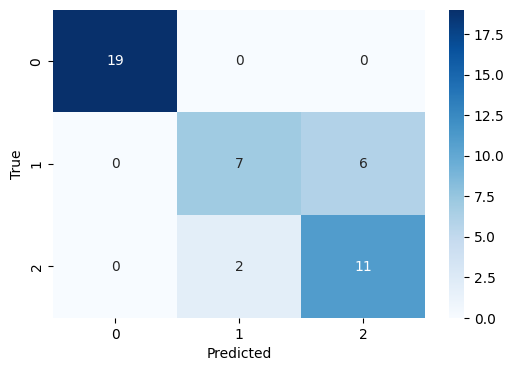

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.78      0.54      0.64        13
         2.0       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45

--------------------------------------------------
DecisionTreeClassifier()
DecisionTree


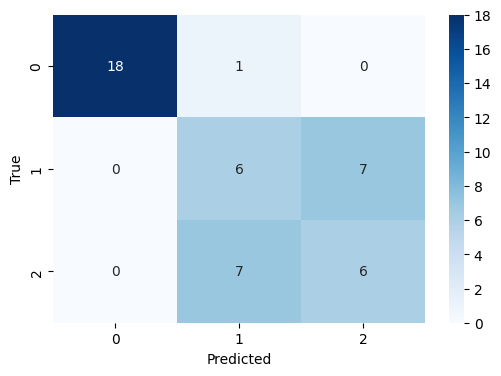

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        19
         1.0       0.43      0.46      0.44        13
         2.0       0.46      0.46      0.46        13

    accuracy                           0.67        45
   macro avg       0.63      0.62      0.63        45
weighted avg       0.68      0.67      0.67        45

--------------------------------------------------
SVC()
SVM


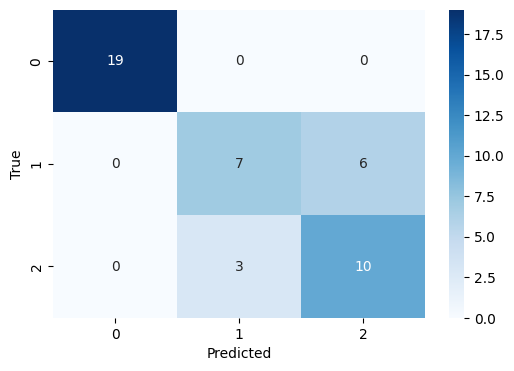

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.70      0.54      0.61        13
         2.0       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

--------------------------------------------------


In [138]:
best_algo_train, max_train_acc, best_algo_test, max_test_acc = eval_models(X_train_sepals, X_test_sepals, y_test) # not good features

best_algo_train_list.append(best_algo_train)
max_train_acc_list.append(max_train_acc)
best_algo_test_list.append(best_algo_test)
max_test_acc_list.append(max_test_acc)

##Try using only petal length and width features

In [139]:
X_train_petals = X_train.iloc[:, 2:]
X_test_petals = X_test.iloc[:, 2:]

X_train_petals.head()

,petal length (cm),petal width (cm)
81,3.7,1.0
133,5.1,1.5
137,5.5,1.8
75,4.4,1.4
109,6.1,2.5


In [140]:
print('including only petals length and width features')
models(X_train_petals, y_train, score)

including only petals length and width features


{'LR': [0.9523809523809524, 0.06734350297014742],
 'DecisionTree': [0.9238095238095239, 0.08832017614757814],
 'SVM': [0.9619047619047619, 0.06317380553057907]}

LogisticRegression()
LR


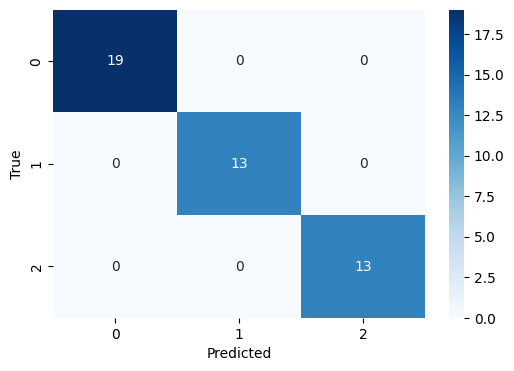

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------
DecisionTreeClassifier()
DecisionTree


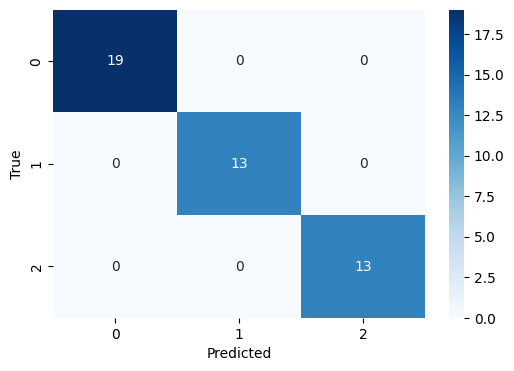

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------
SVC()
SVM


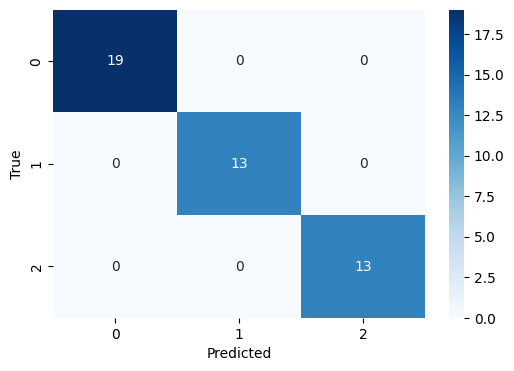

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------


In [142]:
best_algo_train, max_train_acc, best_algo_test, max_test_acc = eval_models(X_train_petals, X_test_petals, y_test) # those of a signifcant impact

best_algo_train_list.append(best_algo_train)
max_train_acc_list.append(max_train_acc)
best_algo_test_list.append(best_algo_test)
max_test_acc_list.append(max_test_acc)

##Try using only petal width and all sepal features

In [143]:
X_train_pwid_sepals = pd.concat([X_train.iloc[:, :2],X_train.iloc[:, 3:]],  axis=1)
X_test_pwid_sepals =  pd.concat([X_test.iloc[:, :2],X_test.iloc[:, 3:]], axis=1)

X_train_pwid_sepals.head()

,sepal length (cm),sepal width (cm),petal width (cm)
81,5.5,2.4,1.0
133,6.3,2.8,1.5
137,6.4,3.1,1.8
75,6.6,3.0,1.4
109,7.2,3.6,2.5


In [145]:
print('including only petals width and all sepal features')
models(X_train_pwid_sepals, y_train, score)



including only petals width and all sepal features


{'LR': [0.9333333333333333, 0.08832017614757814],
 'DecisionTree': [0.8761904761904761, 0.1263476110611581],
 'SVM': [0.9047619047619048, 0.12417528390862188]}

LogisticRegression()
LR


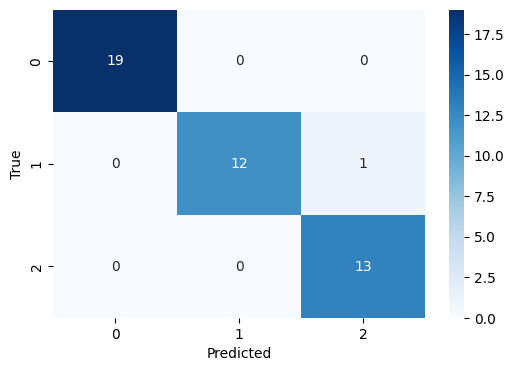

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.92      0.96        13
         2.0       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

--------------------------------------------------
DecisionTreeClassifier()
DecisionTree


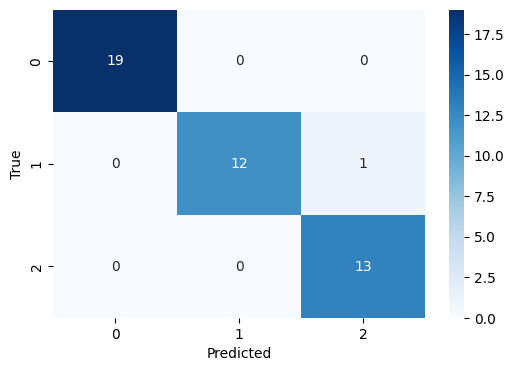

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.92      0.96        13
         2.0       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

--------------------------------------------------
SVC()
SVM


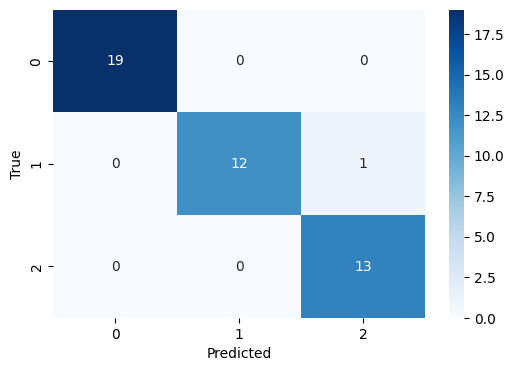

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.92      0.96        13
         2.0       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

--------------------------------------------------


In [146]:
best_algo_train, max_train_acc, best_algo_test, max_test_acc = eval_models(X_train_pwid_sepals, X_test_pwid_sepals, y_test)

best_algo_train_list.append(best_algo_train)
max_train_acc_list.append(max_train_acc)
best_algo_test_list.append(best_algo_test)
max_test_acc_list.append(max_test_acc)

##Try using only petal length and all sepal features

In [147]:
X_train_plen_sepals = X_train.iloc[:, :3]
X_test_plen_sepals = X_test.iloc[:, :3]

X_train_plen_sepals.head()

,sepal length (cm),sepal width (cm),petal length (cm)
81,5.5,2.4,3.7
133,6.3,2.8,5.1
137,6.4,3.1,5.5
75,6.6,3.0,4.4
109,7.2,3.6,6.1


In [148]:
print('including only petals length and all sepal features')
models(X_train_plen_sepals, y_train, score)

including only petals length and all sepal features


{'LR': [0.9333333333333333, 0.10257456775494295],
 'DecisionTree': [0.8761904761904763, 0.1150766283199483],
 'SVM': [0.9428571428571428, 0.10168645954315536]}

LogisticRegression()
LR


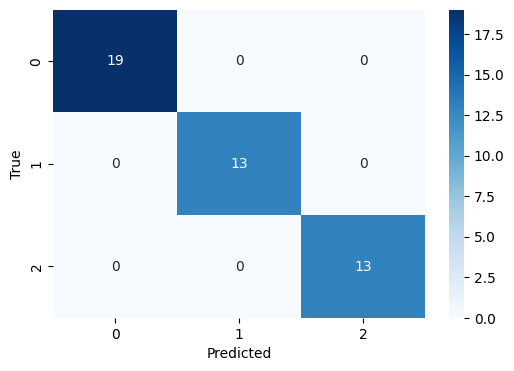

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------
DecisionTreeClassifier()
DecisionTree


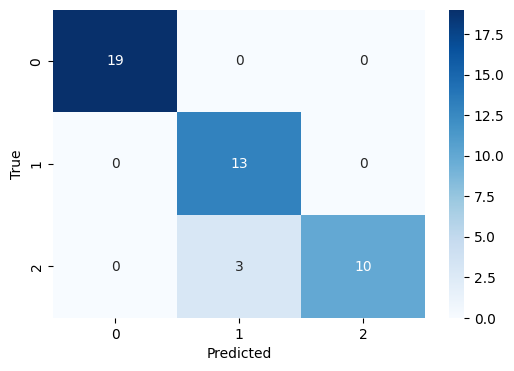

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.81      1.00      0.90        13
         2.0       1.00      0.77      0.87        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45

--------------------------------------------------
SVC()
SVM


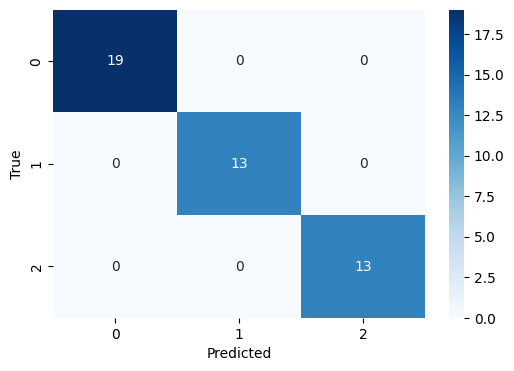

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------


In [149]:
best_algo_train, max_train_acc, best_algo_test, max_test_acc = eval_models(X_train_plen_sepals, X_test_plen_sepals, y_test)

best_algo_train_list.append(best_algo_train)
max_train_acc_list.append(max_train_acc)
best_algo_test_list.append(best_algo_test)
max_test_acc_list.append(max_test_acc)

<h2>Final Report</h2>

In [155]:
from tabulate import tabulate

features_used = ['All Features', 'Sepal only', 'Petal only', 'PetalWidth, Sepal(Len, Wid)', 'PetalLen, Sepal(Len, Wid)']

# Create a list to hold the table rows
table_rows = []

for i, f in enumerate(features_used):
    table_row = [f, best_algo_train_list[i], max_train_acc_list[i], best_algo_test_list[i], max_test_acc_list[i]]
    table_rows.append(table_row)

# Define headers for the table
headers = ['Features Used', 'Best Train Model', 'Train Accuracy', 'Best Test Model', 'Test Accuracy']

# Use tabulate to create the table
table = tabulate(table_rows, headers=headers, tablefmt='grid')

# Print the table
print(table)


+-----------------------------+--------------------+------------------+-------------------+-----------------+
| Features Used               | Best Train Model   |   Train Accuracy | Best Test Model   |   Test Accuracy |
+=============================+====================+==================+===================+=================+
| All Features                | DecisionTree       |         1        | LR                |        1        |
+-----------------------------+--------------------+------------------+-------------------+-----------------+
| Sepal only                  | DecisionTree       |         0.961905 | LR                |        0.822222 |
+-----------------------------+--------------------+------------------+-------------------+-----------------+
| Petal only                  | DecisionTree       |         0.990476 | LR                |        1        |
+-----------------------------+--------------------+------------------+-------------------+-----------------+
| PetalWid